<a href="https://colab.research.google.com/github/macgyver121/my_project/blob/main/Data%20Engineering%20project/Step1%2B2_DataEng_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step1

# Data Collection from Database and API

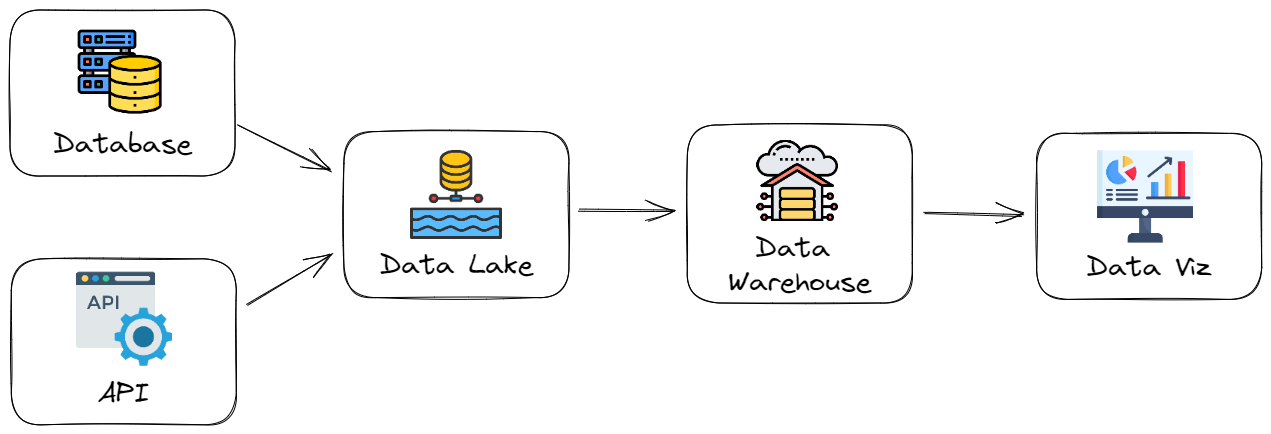

# Get data from MySQL Database

## Install PyMySQL 

In [1]:
! pip install pymysql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 1.8 MB/s eta 0:00:00


## Config DB credential

In [2]:
import os

# database credential it is not real information
class Config:
  MYSQL_HOST = '##.###.###.##'
  MYSQL_PORT = 3306
  MYSQL_USER = 'aaaaa'
  MYSQL_PASSWORD = 'bbbbbbb'
  MYSQL_DB = 'ccccc'
  MYSQL_CHARSET = 'dddd'

## Connect to DB

In [4]:
import pymysql

# Connect to the database
connection = pymysql.connect(host=Config.MYSQL_HOST,
                             port=Config.MYSQL_PORT,
                             user=Config.MYSQL_USER,
                             password=Config.MYSQL_PASSWORD,
                             db=Config.MYSQL_DB,
                             charset=Config.MYSQL_CHARSET,
                             cursorclass=pymysql.cursors.DictCursor)

In [5]:
connection

## List Tables

In [6]:
# list all tables ด้วย SQL คำสั่ง show tables;
cursor = connection.cursor()  # cursor เป็นตัวที่เข้าไปเชื่อมกับ database
cursor.execute("show tables;")
tables = cursor.fetchall()  # เก็บผลลัพท์ที่ cursor ไปดึง tables ออกมาได้
cursor.close()
print(tables)

[{'Tables_in_r2de2': 'audible_data'}, {'Tables_in_r2de2': 'audible_transaction'}]


## Query Table

In [ ]:
sql = "SELECT * FROM audible_data"
sql2 = "SELECT * FROM audible_transaction"
audible_data = pd.read_sql(sql, connection)
audible_transaction = pd.read_sql(sql2, connection)

In [16]:
audible_transaction

/usr/local/lib/python3.9/dist-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,timestamp,user_id,book_id,country
0,2021-05-01 00:00:01,ad8eca41,1584,Portugal
1,2021-05-01 00:00:03,561b26c1,829,United States of America
2,2021-05-01 00:00:04,81f149e5,1391,Japan
3,2021-05-01 00:00:07,4f218413,1586,Taiwan
4,2021-05-01 00:00:18,a4066781,300,United States of America
...,...,...,...,...
1998816,2021-07-31 23:59:47,72da1411,600,Portugal
1998817,2021-07-31 23:59:48,620c27c8,462,Montenegro
1998818,2021-07-31 23:59:55,84fe88ab,1656,United States of America
1998819,2021-07-31 23:59:57,fd6cc4fc,522,United States of America


In [15]:
audible_data

,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Rating,Total No. of Ratings,Price
Book_ID,,,,,,,,,,
1,Bamboozled by Jesus,How God Tricked Me into the Life of My Dreams,Yvonne Orji,Yvonne Orji,6 hrs and 31 mins,Unabridged Audiobook,Biographies & Memoirs,5,47.0,$29.65
2,Sixth Realm Part 1,"A LitRPG Fantasy Series (The Ten Realms, Book 6)",Michael Chatfield,Neil Hellegers,13 hrs and 33 mins,Unabridged Audiobook,Science Fiction & Fantasy,4.5,98.0,$24.95
3,Go Tell the Bees That I Am Gone,"Outlander, Book 9",Diana Gabaldon,Davina Porter,27 hrs and 30 mins,Unabridged Audiobook,Science Fiction & Fantasy,None,NaN,$41.99
4,How the Word Is Passed,A Reckoning with the History of Slavery Across...,Clint Smith,Clint Smith,10 hrs and 7 mins,Unabridged Audiobook,History,None,NaN,$29.65
5,The Devil May Dance,A Novel,Jake Tapper,Rob Shapiro,10 hrs and 12 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.5,108.0,$29.65
...,...,...,...,...,...,...,...,...,...,...
2265,Kama Sutra,Become a Master of the Art of Love Making. Tan...,Eva Becker,ChasMandala,3 hrs and 29 mins,Unabridged Audiobook,Erotica,5,203.0,$14.95
2266,Meditación Práctica para Principiantes [Prac...,Una guía para principiantes para aliviar la an...,Taylor Knox,William Ditilio,3 hrs and 14 mins,Unabridged Audiobook,Health & Wellness,5,203.0,$14.95
2267,Forgotten,"The Untold Story of D-day's Black Heroes, at H...",Linda Hervieux,Ron Butler,9 hrs and 33 mins,Unabridged Audiobook,History,4.6,70.0,$24.95


# Join table: audible_transaction & audible_data

In [17]:
transaction = audible_transaction.merge(audible_data, how="left", left_on="book_id", right_on="Book_ID")

In [18]:
transaction

,timestamp,user_id,book_id,country,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Rating,Total No. of Ratings,Price
0,2021-05-01 00:00:01,ad8eca41,1584,Portugal,Sycamore Row,None,John Grisham,Michael Beck,20 hrs and 46 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,25863.0,$35.00
1,2021-05-01 00:00:03,561b26c1,829,United States of America,The 5 Love Languages of Children,The Secret to Loving Children Effectively,Gary Chapman,Chris Fabry,5 hrs and 48 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,2441.0,$19.59
2,2021-05-01 00:00:04,81f149e5,1391,Japan,The Guardians,A Novel,John Grisham,Michael Beck,11 hrs and 50 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,26781.0,$31.50
3,2021-05-01 00:00:07,4f218413,1586,Taiwan,How to Be a 3% Man,None,Corey Wayne,Corey Wayne,7 hrs and 33 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,11459.0,$19.95
4,2021-05-01 00:00:18,a4066781,300,United States of America,Napoleon Hill's Outwitting the Devil,The Secret to Freedom and Success,Napoleon Hill,Dan John Miller,5 hrs and 51 mins,Unabridged Audiobook,Business & Careers,4.8,9305.0,$17.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998816,2021-07-31 23:59:47,72da1411,600,Portugal,The Time of Contempt,"The Witcher, Book 2",Andrzej Sapkowski,Peter Kenny,11 hrs and 55 mins,Unabridged Audiobook,Science Fiction & Fantasy,4.7,14344.0,$25.08
1998817,2021-07-31 23:59:48,620c27c8,462,Montenegro,Endurance,Shackleton's Incredible Voyage,Alfred Lansing,Simon Prebble,10 hrs and 20 mins,Unabridged Audiobook,History,4.7,18764.0,$24.95
1998818,2021-07-31 23:59:55,84fe88ab,1656,United States of America,The Spy and the Traitor,The Greatest Espionage Story of the Cold War,Ben Macintyre,John Lee,13 hrs and 20 mins,Unabridged Audiobook,Biographies & Memoirs,4.8,7150.0,$31.95
1998819,2021-07-31 23:59:57,fd6cc4fc,522,United States of America,Lilac Girls,A Novel,Martha Hall Kelly,Cassandra Campbell,17 hrs and 30 mins,Unabridged Audiobook,Literature & Fiction,4.7,19401.0,$31.50




---


# Get data from REST API

In [19]:
import requests

## Requests library

In [20]:
url = "https://r2de2-workshop-vmftiryt6q-ts.a.run.app/usd_thb_conversion_rate"
r = requests.get(url)
result_conversion_rate = r.json()

In [21]:
result_conversion_rate

{'conversion_rate': {'2021-08-12': 33.084,
  '2021-08-11': 33.145,
  '2021-08-10': 33.46,
  '2021-08-09': 33.464,
  '2021-08-08': 33.395,
  '2021-08-07': 33.422,
  '2021-08-06': 33.45,
  '2021-08-05': 33.263,
  '2021-08-04': 33.137,
  '2021-08-03': 33.022,
  '2021-08-02': 32.957,
  '2021-08-01': 32.895,
  '2021-07-31': 32.887,
  '2021-07-30': 32.887,
  '2021-07-29': 32.87,
  '2021-07-28': 32.82,
  '2021-07-27': 32.937,
  '2021-07-26': 32.929,
  '2021-07-25': 32.94,
  '2021-07-24': 32.963,
  '2021-07-23': 32.928,
  '2021-07-22': 32.887,
  '2021-07-21': 32.857,
  '2021-07-20': 32.829,
  '2021-07-19': 32.854,
  '2021-07-18': 32.807,
  '2021-07-17': 32.795,
  '2021-07-16': 32.783,
  '2021-07-15': 32.686,
  '2021-07-14': 32.605,
  '2021-07-13': 32.654,
  '2021-07-12': 32.664,
  '2021-07-11': 32.506,
  '2021-07-10': 32.482,
  '2021-07-09': 32.512,
  '2021-07-08': 32.534,
  '2021-07-07': 32.334,
  '2021-07-06': 32.271,
  '2021-07-05': 32.112,
  '2021-07-04': 32.136,
  '2021-07-03': 32.125,
  

In [22]:
print(type(result_conversion_rate))
assert isinstance(result_conversion_rate, dict)  # assert ใช้ check ว่าคำสั่งนี้เป็นจริงหรือไม่

<class 'dict'>


 ## Convert to Pandas

In [23]:
conversion_rate = pd.DataFrame(result_conversion_rate)

In [24]:
conversion_rate

,conversion_rate
2021-04-01,31.194
2021-04-02,31.290
2021-04-03,31.256
2021-04-04,31.244
2021-04-05,31.342
...,...
2021-08-08,33.395
2021-08-09,33.464
2021-08-10,33.460
2021-08-11,33.145


In [25]:
conversion_rate = conversion_rate.reset_index().rename(columns={"index": "date"})
conversion_rate[:3]

,date,conversion_rate
0,2021-04-01,31.194
1,2021-04-02,31.290
2,2021-04-03,31.256


# Join the data

In [26]:
transaction

,timestamp,user_id,book_id,country,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Rating,Total No. of Ratings,Price
0,2021-05-01 00:00:01,ad8eca41,1584,Portugal,Sycamore Row,None,John Grisham,Michael Beck,20 hrs and 46 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,25863.0,$35.00
1,2021-05-01 00:00:03,561b26c1,829,United States of America,The 5 Love Languages of Children,The Secret to Loving Children Effectively,Gary Chapman,Chris Fabry,5 hrs and 48 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,2441.0,$19.59
2,2021-05-01 00:00:04,81f149e5,1391,Japan,The Guardians,A Novel,John Grisham,Michael Beck,11 hrs and 50 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,26781.0,$31.50
3,2021-05-01 00:00:07,4f218413,1586,Taiwan,How to Be a 3% Man,None,Corey Wayne,Corey Wayne,7 hrs and 33 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,11459.0,$19.95
4,2021-05-01 00:00:18,a4066781,300,United States of America,Napoleon Hill's Outwitting the Devil,The Secret to Freedom and Success,Napoleon Hill,Dan John Miller,5 hrs and 51 mins,Unabridged Audiobook,Business & Careers,4.8,9305.0,$17.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998816,2021-07-31 23:59:47,72da1411,600,Portugal,The Time of Contempt,"The Witcher, Book 2",Andrzej Sapkowski,Peter Kenny,11 hrs and 55 mins,Unabridged Audiobook,Science Fiction & Fantasy,4.7,14344.0,$25.08
1998817,2021-07-31 23:59:48,620c27c8,462,Montenegro,Endurance,Shackleton's Incredible Voyage,Alfred Lansing,Simon Prebble,10 hrs and 20 mins,Unabridged Audiobook,History,4.7,18764.0,$24.95
1998818,2021-07-31 23:59:55,84fe88ab,1656,United States of America,The Spy and the Traitor,The Greatest Espionage Story of the Cold War,Ben Macintyre,John Lee,13 hrs and 20 mins,Unabridged Audiobook,Biographies & Memoirs,4.8,7150.0,$31.95
1998819,2021-07-31 23:59:57,fd6cc4fc,522,United States of America,Lilac Girls,A Novel,Martha Hall Kelly,Cassandra Campbell,17 hrs and 30 mins,Unabridged Audiobook,Literature & Fiction,4.7,19401.0,$31.50


In [27]:
# create new column to join transaction and conversion_rate
transaction['date'] = transaction['timestamp']
transaction

,timestamp,user_id,book_id,country,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Rating,Total No. of Ratings,Price,date
0,2021-05-01 00:00:01,ad8eca41,1584,Portugal,Sycamore Row,None,John Grisham,Michael Beck,20 hrs and 46 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,25863.0,$35.00,2021-05-01 00:00:01
1,2021-05-01 00:00:03,561b26c1,829,United States of America,The 5 Love Languages of Children,The Secret to Loving Children Effectively,Gary Chapman,Chris Fabry,5 hrs and 48 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,2441.0,$19.59,2021-05-01 00:00:03
2,2021-05-01 00:00:04,81f149e5,1391,Japan,The Guardians,A Novel,John Grisham,Michael Beck,11 hrs and 50 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,26781.0,$31.50,2021-05-01 00:00:04
3,2021-05-01 00:00:07,4f218413,1586,Taiwan,How to Be a 3% Man,None,Corey Wayne,Corey Wayne,7 hrs and 33 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,11459.0,$19.95,2021-05-01 00:00:07
4,2021-05-01 00:00:18,a4066781,300,United States of America,Napoleon Hill's Outwitting the Devil,The Secret to Freedom and Success,Napoleon Hill,Dan John Miller,5 hrs and 51 mins,Unabridged Audiobook,Business & Careers,4.8,9305.0,$17.49,2021-05-01 00:00:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998816,2021-07-31 23:59:47,72da1411,600,Portugal,The Time of Contempt,"The Witcher, Book 2",Andrzej Sapkowski,Peter Kenny,11 hrs and 55 mins,Unabridged Audiobook,Science Fiction & Fantasy,4.7,14344.0,$25.08,2021-07-31 23:59:47
1998817,2021-07-31 23:59:48,620c27c8,462,Montenegro,Endurance,Shackleton's Incredible Voyage,Alfred Lansing,Simon Prebble,10 hrs and 20 mins,Unabridged Audiobook,History,4.7,18764.0,$24.95,2021-07-31 23:59:48
1998818,2021-07-31 23:59:55,84fe88ab,1656,United States of America,The Spy and the Traitor,The Greatest Espionage Story of the Cold War,Ben Macintyre,John Lee,13 hrs and 20 mins,Unabridged Audiobook,Biographies & Memoirs,4.8,7150.0,$31.95,2021-07-31 23:59:55
1998819,2021-07-31 23:59:57,fd6cc4fc,522,United States of America,Lilac Girls,A Novel,Martha Hall Kelly,Cassandra Campbell,17 hrs and 30 mins,Unabridged Audiobook,Literature & Fiction,4.7,19401.0,$31.50,2021-07-31 23:59:57


In [28]:
# change type column date to datetime
transaction['date'] = pd.to_datetime(transaction['date']).dt.date
conversion_rate['date'] = pd.to_datetime(conversion_rate['date']).dt.date
transaction.head()

,timestamp,user_id,book_id,country,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Rating,Total No. of Ratings,Price,date
0,2021-05-01 00:00:01,ad8eca41,1584,Portugal,Sycamore Row,None,John Grisham,Michael Beck,20 hrs and 46 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,25863.0,$35.00,2021-05-01
1,2021-05-01 00:00:03,561b26c1,829,United States of America,The 5 Love Languages of Children,The Secret to Loving Children Effectively,Gary Chapman,Chris Fabry,5 hrs and 48 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,2441.0,$19.59,2021-05-01
2,2021-05-01 00:00:04,81f149e5,1391,Japan,The Guardians,A Novel,John Grisham,Michael Beck,11 hrs and 50 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,26781.0,$31.50,2021-05-01
3,2021-05-01 00:00:07,4f218413,1586,Taiwan,How to Be a 3% Man,None,Corey Wayne,Corey Wayne,7 hrs and 33 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,11459.0,$19.95,2021-05-01
4,2021-05-01 00:00:18,a4066781,300,United States of America,Napoleon Hill's Outwitting the Devil,The Secret to Freedom and Success,Napoleon Hill,Dan John Miller,5 hrs and 51 mins,Unabridged Audiobook,Business & Careers,4.8,9305.0,$17.49,2021-05-01


In [29]:
# join table
final_df = transaction.merge(conversion_rate, how = 'left',on = 'date')
final_df

,timestamp,user_id,book_id,country,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Rating,Total No. of Ratings,Price,date,conversion_rate
0,2021-05-01 00:00:01,ad8eca41,1584,Portugal,Sycamore Row,None,John Grisham,Michael Beck,20 hrs and 46 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,25863.0,$35.00,2021-05-01,31.140
1,2021-05-01 00:00:03,561b26c1,829,United States of America,The 5 Love Languages of Children,The Secret to Loving Children Effectively,Gary Chapman,Chris Fabry,5 hrs and 48 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,2441.0,$19.59,2021-05-01,31.140
2,2021-05-01 00:00:04,81f149e5,1391,Japan,The Guardians,A Novel,John Grisham,Michael Beck,11 hrs and 50 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,26781.0,$31.50,2021-05-01,31.140
3,2021-05-01 00:00:07,4f218413,1586,Taiwan,How to Be a 3% Man,None,Corey Wayne,Corey Wayne,7 hrs and 33 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,11459.0,$19.95,2021-05-01,31.140
4,2021-05-01 00:00:18,a4066781,300,United States of America,Napoleon Hill's Outwitting the Devil,The Secret to Freedom and Success,Napoleon Hill,Dan John Miller,5 hrs and 51 mins,Unabridged Audiobook,Business & Careers,4.8,9305.0,$17.49,2021-05-01,31.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998816,2021-07-31 23:59:47,72da1411,600,Portugal,The Time of Contempt,"The Witcher, Book 2",Andrzej Sapkowski,Peter Kenny,11 hrs and 55 mins,Unabridged Audiobook,Science Fiction & Fantasy,4.7,14344.0,$25.08,2021-07-31,32.887
1998817,2021-07-31 23:59:48,620c27c8,462,Montenegro,Endurance,Shackleton's Incredible Voyage,Alfred Lansing,Simon Prebble,10 hrs and 20 mins,Unabridged Audiobook,History,4.7,18764.0,$24.95,2021-07-31,32.887
1998818,2021-07-31 23:59:55,84fe88ab,1656,United States of America,The Spy and the Traitor,The Greatest Espionage Story of the Cold War,Ben Macintyre,John Lee,13 hrs and 20 mins,Unabridged Audiobook,Biographies & Memoirs,4.8,7150.0,$31.95,2021-07-31,32.887
1998819,2021-07-31 23:59:57,fd6cc4fc,522,United States of America,Lilac Girls,A Novel,Martha Hall Kelly,Cassandra Campbell,17 hrs and 30 mins,Unabridged Audiobook,Literature & Fiction,4.7,19401.0,$31.50,2021-07-31,32.887


In [30]:
final_df["Price"] = final_df.apply(lambda x: x["Price"].replace("$",""), axis=1)
final_df["Price"] = final_df["Price"].astype(float)

In [31]:
final_df

,timestamp,user_id,book_id,country,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Rating,Total No. of Ratings,Price,date,conversion_rate
0,2021-05-01 00:00:01,ad8eca41,1584,Portugal,Sycamore Row,None,John Grisham,Michael Beck,20 hrs and 46 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,25863.0,35.00,2021-05-01,31.140
1,2021-05-01 00:00:03,561b26c1,829,United States of America,The 5 Love Languages of Children,The Secret to Loving Children Effectively,Gary Chapman,Chris Fabry,5 hrs and 48 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,2441.0,19.59,2021-05-01,31.140
2,2021-05-01 00:00:04,81f149e5,1391,Japan,The Guardians,A Novel,John Grisham,Michael Beck,11 hrs and 50 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,26781.0,31.50,2021-05-01,31.140
3,2021-05-01 00:00:07,4f218413,1586,Taiwan,How to Be a 3% Man,None,Corey Wayne,Corey Wayne,7 hrs and 33 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,11459.0,19.95,2021-05-01,31.140
4,2021-05-01 00:00:18,a4066781,300,United States of America,Napoleon Hill's Outwitting the Devil,The Secret to Freedom and Success,Napoleon Hill,Dan John Miller,5 hrs and 51 mins,Unabridged Audiobook,Business & Careers,4.8,9305.0,17.49,2021-05-01,31.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998816,2021-07-31 23:59:47,72da1411,600,Portugal,The Time of Contempt,"The Witcher, Book 2",Andrzej Sapkowski,Peter Kenny,11 hrs and 55 mins,Unabridged Audiobook,Science Fiction & Fantasy,4.7,14344.0,25.08,2021-07-31,32.887
1998817,2021-07-31 23:59:48,620c27c8,462,Montenegro,Endurance,Shackleton's Incredible Voyage,Alfred Lansing,Simon Prebble,10 hrs and 20 mins,Unabridged Audiobook,History,4.7,18764.0,24.95,2021-07-31,32.887
1998818,2021-07-31 23:59:55,84fe88ab,1656,United States of America,The Spy and the Traitor,The Greatest Espionage Story of the Cold War,Ben Macintyre,John Lee,13 hrs and 20 mins,Unabridged Audiobook,Biographies & Memoirs,4.8,7150.0,31.95,2021-07-31,32.887
1998819,2021-07-31 23:59:57,fd6cc4fc,522,United States of America,Lilac Girls,A Novel,Martha Hall Kelly,Cassandra Campbell,17 hrs and 30 mins,Unabridged Audiobook,Literature & Fiction,4.7,19401.0,31.50,2021-07-31,32.887


In [32]:
final_df.dtypes

timestamp               datetime64[ns]
user_id                         object
book_id                          int64
country                         object
Book Title                      object
Book Subtitle                   object
Book Author                     object
Book Narrator                   object
Audio Runtime                   object
Audiobook_Type                  object
Categories                      object
Rating                          object
Total No. of Ratings           float64
Price                          float64
date                            object
conversion_rate                float64
dtype: object

In [33]:
# create column THBprice
final_df['THBPrice'] = final_df['Price'] * final_df['conversion_rate']

In [34]:
final_df.head()

,timestamp,user_id,book_id,country,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Rating,Total No. of Ratings,Price,date,conversion_rate,THBPrice
0,2021-05-01 00:00:01,ad8eca41,1584,Portugal,Sycamore Row,None,John Grisham,Michael Beck,20 hrs and 46 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,25863.0,35.00,2021-05-01,31.14,1089.9000
1,2021-05-01 00:00:03,561b26c1,829,United States of America,The 5 Love Languages of Children,The Secret to Loving Children Effectively,Gary Chapman,Chris Fabry,5 hrs and 48 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,2441.0,19.59,2021-05-01,31.14,610.0326
2,2021-05-01 00:00:04,81f149e5,1391,Japan,The Guardians,A Novel,John Grisham,Michael Beck,11 hrs and 50 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,26781.0,31.50,2021-05-01,31.14,980.9100
3,2021-05-01 00:00:07,4f218413,1586,Taiwan,How to Be a 3% Man,None,Corey Wayne,Corey Wayne,7 hrs and 33 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,11459.0,19.95,2021-05-01,31.14,621.2430
4,2021-05-01 00:00:18,a4066781,300,United States of America,Napoleon Hill's Outwitting the Devil,The Secret to Freedom and Success,Napoleon Hill,Dan John Miller,5 hrs and 51 mins,Unabridged Audiobook,Business & Careers,4.8,9305.0,17.49,2021-05-01,31.14,544.6386


In [36]:
final_df.head()

,timestamp,user_id,book_id,country,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Rating,Total No. of Ratings,Price,date,conversion_rate,THBPrice
0,2021-05-01 00:00:01,ad8eca41,1584,Portugal,Sycamore Row,None,John Grisham,Michael Beck,20 hrs and 46 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,25863.0,35.00,2021-05-01,31.14,1089.9000
1,2021-05-01 00:00:03,561b26c1,829,United States of America,The 5 Love Languages of Children,The Secret to Loving Children Effectively,Gary Chapman,Chris Fabry,5 hrs and 48 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,2441.0,19.59,2021-05-01,31.14,610.0326
2,2021-05-01 00:00:04,81f149e5,1391,Japan,The Guardians,A Novel,John Grisham,Michael Beck,11 hrs and 50 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,26781.0,31.50,2021-05-01,31.14,980.9100
3,2021-05-01 00:00:07,4f218413,1586,Taiwan,How to Be a 3% Man,None,Corey Wayne,Corey Wayne,7 hrs and 33 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,11459.0,19.95,2021-05-01,31.14,621.2430
4,2021-05-01 00:00:18,a4066781,300,United States of America,Napoleon Hill's Outwitting the Devil,The Secret to Freedom and Success,Napoleon Hill,Dan John Miller,5 hrs and 51 mins,Unabridged Audiobook,Business & Careers,4.8,9305.0,17.49,2021-05-01,31.14,544.6386


สามารถ drop column ที่ไม่จำเป็นต้องใช้ได้ เช่น date ที่ซ้ำซ้อนกับ timestamp

axis = 1 หมายถึง drop column (ถ้า axis=0 จะใช้ drop row ได้)


In [37]:
# drop the column date that does not use
final_df = final_df.drop("date", axis=1)

In [38]:
final_df

,timestamp,user_id,book_id,country,Book Title,Book Subtitle,Book Author,Book Narrator,Audio Runtime,Audiobook_Type,Categories,Rating,Total No. of Ratings,Price,conversion_rate,THBPrice
0,2021-05-01 00:00:01,ad8eca41,1584,Portugal,Sycamore Row,None,John Grisham,Michael Beck,20 hrs and 46 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,25863.0,35.00,31.140,1089.90000
1,2021-05-01 00:00:03,561b26c1,829,United States of America,The 5 Love Languages of Children,The Secret to Loving Children Effectively,Gary Chapman,Chris Fabry,5 hrs and 48 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,2441.0,19.59,31.140,610.03260
2,2021-05-01 00:00:04,81f149e5,1391,Japan,The Guardians,A Novel,John Grisham,Michael Beck,11 hrs and 50 mins,Unabridged Audiobook,"Mystery, Thriller & Suspense",4.6,26781.0,31.50,31.140,980.91000
3,2021-05-01 00:00:07,4f218413,1586,Taiwan,How to Be a 3% Man,None,Corey Wayne,Corey Wayne,7 hrs and 33 mins,Unabridged Audiobook,"Relationships, Parenting & Personal Development",4.8,11459.0,19.95,31.140,621.24300
4,2021-05-01 00:00:18,a4066781,300,United States of America,Napoleon Hill's Outwitting the Devil,The Secret to Freedom and Success,Napoleon Hill,Dan John Miller,5 hrs and 51 mins,Unabridged Audiobook,Business & Careers,4.8,9305.0,17.49,31.140,544.63860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998816,2021-07-31 23:59:47,72da1411,600,Portugal,The Time of Contempt,"The Witcher, Book 2",Andrzej Sapkowski,Peter Kenny,11 hrs and 55 mins,Unabridged Audiobook,Science Fiction & Fantasy,4.7,14344.0,25.08,32.887,824.80596
1998817,2021-07-31 23:59:48,620c27c8,462,Montenegro,Endurance,Shackleton's Incredible Voyage,Alfred Lansing,Simon Prebble,10 hrs and 20 mins,Unabridged Audiobook,History,4.7,18764.0,24.95,32.887,820.53065
1998818,2021-07-31 23:59:55,84fe88ab,1656,United States of America,The Spy and the Traitor,The Greatest Espionage Story of the Cold War,Ben Macintyre,John Lee,13 hrs and 20 mins,Unabridged Audiobook,Biographies & Memoirs,4.8,7150.0,31.95,32.887,1050.73965
1998819,2021-07-31 23:59:57,fd6cc4fc,522,United States of America,Lilac Girls,A Novel,Martha Hall Kelly,Cassandra Campbell,17 hrs and 30 mins,Unabridged Audiobook,Literature & Fiction,4.7,19401.0,31.50,32.887,1035.94050


## Save to CSV

In [39]:
# TODO: save "to csv" file
final_df.to_csv('output.csv', index=False)

In [104]:
audible_data.to_csv('audible_data.csv', index=False)
audible_transaction.to_csv('audible_transaction.csv', index=False)

transaction.to_csv('transaction.csv', index=False)
conversion_rate.to_csv('conversion_rate.csv', index=False)

# Step2

# Install pyspark

In [55]:
!apt-get update                                                                          # อัพเดท Package ทั้งหมดใน VM ตัวนี้ (colab เป้นเหมือน Virsual machine ที่ google ให้เรามาใช้)
!apt-get install openjdk-8-jdk-headless -qq > /dev/null                                  # ติดตั้ง Java Development Kit (จำเป็นสำหรับการติดตั้ง Spark)
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz # ติดตั้ง Spark 3.1.2 (เอามาจากเว็บ spark official เลย และลง spark มันจะลง hadoop ให้ด้วย เพราะมัน base on hadoop อีกที)
!tar xzvf spark-3.1.2-bin-hadoop2.7.tgz                                                  # Unzip ไฟล์ Spark 3.1.2
!pip install -q findspark==1.3.0                                                         # ติดตั้ง Package Python สำหรับเชื่อมต่อกับ Spark 

Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:3 http://archive.ubuntu.com/ubuntu focal InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Get:7 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:10 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:13 http://ppa.launchpad.net/u

In [56]:
# Set enviroment variable ให้ Python รู้จัก Spark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [57]:
# ติดตั้ง PySpark ลงใน Python
!pip install pyspark==3.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.4/212.4 MB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 KB 20.7 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880770 sha256=8dd7e0e6062e8d8ad6c4b6442eecfdc5c9167768e6813e040eb2845eaa1a87d7
  Stored in directory: /root/.cache/pip/wheels/11/17/0b/53e7d10fe66ca7647d391cdba323fcf5b2f9dfcb7ebad87aa7
Successfully built pyspark


In [58]:
# Server ของ Google Colab มีกี่ Core
!cat /proc/cpuinfo  # ใช้เช็ค spec computer(ที่ google ให้มา) เน้นดู CPU core 

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

In [59]:
# สร้าง Spark Session เพิ้อใช้งาน Spark (ก่อนใช้งาน spark ต้องมีการ สร้าง spark session ขึ้นมาก่อน)
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [60]:
# ดูเวอร์ชั่น Python
import sys
sys.version_info # 3.7.13

sys.version_info(major=3, minor=9, micro=16, releaselevel='final', serial=0)

In [61]:
# ดูเวอร์ชั่น Spark
spark.version

'3.1.2'

# create data

In [62]:
dt = spark.read.csv('/content/output.csv', header = True, inferSchema = True, )

# Data profiling

In [63]:
dt

DataFrame[timestamp: string, user_id: string, book_id: int, country: string, Book Title: string, Book Subtitle: string, Book Author: string, Book Narrator: string, Audio Runtime: string, Audiobook_Type: string, Categories: string, Rating: string, Total No. of Ratings: double, Price: double, conversion_rate: double, THBPrice: double]

In [64]:
# see information
dt.show()

+-------------------+--------+-------+--------------------+--------------------+--------------------+------------------+-------------------+------------------+--------------------+--------------------+------+--------------------+-----+---------------+------------------+
|          timestamp| user_id|book_id|             country|          Book Title|       Book Subtitle|       Book Author|      Book Narrator|     Audio Runtime|      Audiobook_Type|          Categories|Rating|Total No. of Ratings|Price|conversion_rate|          THBPrice|
+-------------------+--------+-------+--------------------+--------------------+--------------------+------------------+-------------------+------------------+--------------------+--------------------+------+--------------------+-----+---------------+------------------+
|2021-05-01 00:00:01|ad8eca41|   1584|            Portugal|        Sycamore Row|                null|      John Grisham|       Michael Beck|20 hrs and 46 mins|Unabridged Audiobook|Mystery

In [65]:
# select some column
dt.select('country').show(5)
#dt.select(dt['country']).show(5)

+--------------------+
|             country|
+--------------------+
|            Portugal|
|United States of ...|
|               Japan|
|              Taiwan|
|United States of ...|
+--------------------+
only showing top 5 rows



In [66]:
# print schema
dt.printSchema()

root
 |-- timestamp: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- book_id: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- Book Title: string (nullable = true)
 |-- Book Subtitle: string (nullable = true)
 |-- Book Author: string (nullable = true)
 |-- Book Narrator: string (nullable = true)
 |-- Audio Runtime: string (nullable = true)
 |-- Audiobook_Type: string (nullable = true)
 |-- Categories: string (nullable = true)
 |-- Rating: string (nullable = true)
 |-- Total No. of Ratings: double (nullable = true)
 |-- Price: double (nullable = true)
 |-- conversion_rate: double (nullable = true)
 |-- THBPrice: double (nullable = true)



In [67]:
# count row and column
print((dt.count(), len(dt.columns)))

(1998821, 16)


In [68]:
# show describe
dt.describe().show()

+-------+-------------------+--------+-----------------+-------+-------------------------------------+--------------------+-------------+--------------------+--------------+--------------------+--------------------+-------------------+--------------------+------------------+------------------+------------------+
|summary|          timestamp| user_id|          book_id|country|                           Book Title|       Book Subtitle|  Book Author|       Book Narrator| Audio Runtime|      Audiobook_Type|          Categories|             Rating|Total No. of Ratings|             Price|   conversion_rate|          THBPrice|
+-------+-------------------+--------+-----------------+-------+-------------------------------------+--------------------+-------------+--------------------+--------------+--------------------+--------------------+-------------------+--------------------+------------------+------------------+------------------+
|  count|            1998821| 1998821|          1998821|19

In [69]:
# count each column, it's show that have missing values ?
dt.summary('count').show()

+-------+---------+-------+-------+-------+----------+-------------+-----------+-------------+-------------+--------------+----------+-------+--------------------+-------+---------------+--------+
|summary|timestamp|user_id|book_id|country|Book Title|Book Subtitle|Book Author|Book Narrator|Audio Runtime|Audiobook_Type|Categories| Rating|Total No. of Ratings|  Price|conversion_rate|THBPrice|
+-------+---------+-------+-------+-------+----------+-------------+-----------+-------------+-------------+--------------+----------+-------+--------------------+-------+---------------+--------+
|  count|  1998821|1998821|1998821|1998821|   1998821|      1224064|    1998821|      1995200|      1998821|       1994778|   1976542|1984298|             1980677|1998821|        1998821| 1998821|
+-------+---------+-------+-------+-------+----------+-------------+-----------+-------------+-------------+--------------+----------+-------+--------------------+-------+---------------+--------+



In [73]:
# show row that have null
dt.filter(dt['user_id'].isNull()).show()

+---------+-------+-------+-------+----------+-------------+-----------+-------------+-------------+--------------+----------+------+--------------------+-----+---------------+--------+
|timestamp|user_id|book_id|country|Book Title|Book Subtitle|Book Author|Book Narrator|Audio Runtime|Audiobook_Type|Categories|Rating|Total No. of Ratings|Price|conversion_rate|THBPrice|
+---------+-------+-------+-------+----------+-------------+-----------+-------------+-------------+--------------+----------+------+--------------------+-----+---------------+--------+
+---------+-------+-------+-------+----------+-------------+-----------+-------------+-------------+--------------+----------+------+--------------------+-----+---------------+--------+



In [72]:
dt.filter(dt['Rating'].isNull()).show()

+-------------------+--------+-------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+--------------------+--------------------+------+--------------------+-----+---------------+------------------+
|          timestamp| user_id|book_id|             country|          Book Title|       Book Subtitle|         Book Author|       Book Narrator|     Audio Runtime|      Audiobook_Type|          Categories|Rating|Total No. of Ratings|Price|conversion_rate|          THBPrice|
+-------------------+--------+-------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+--------------------+--------------------+------+--------------------+-----+---------------+------------------+
|2021-05-01 00:18:40|62fbe1b3|   1244|United States of ...|Woman Who Glows i...|A Curandera Revea...|         Elena Avila|        Joana Garcia|12 hrs and 31 mins|Unabridged Audio

# EDA - Exploratory Data Analysis

## Non-Graphical EDA

In [75]:
# filter data
dt.where(dt.Price >= 1).show()

+-------------------+--------+-------+--------------------+--------------------+--------------------+------------------+-------------------+------------------+--------------------+--------------------+------+--------------------+-----+---------------+------------------+
|          timestamp| user_id|book_id|             country|          Book Title|       Book Subtitle|       Book Author|      Book Narrator|     Audio Runtime|      Audiobook_Type|          Categories|Rating|Total No. of Ratings|Price|conversion_rate|          THBPrice|
+-------------------+--------+-------+--------------------+--------------------+--------------------+------------------+-------------------+------------------+--------------------+--------------------+------+--------------------+-----+---------------+------------------+
|2021-05-01 00:00:01|ad8eca41|   1584|            Portugal|        Sycamore Row|                null|      John Grisham|       Michael Beck|20 hrs and 46 mins|Unabridged Audiobook|Mystery

In [76]:
# filter with datetime
dt.where( (dt.timestamp >= '2021-05-01 00:00:00') & (dt.timestamp <= '2021-05-31 23:59:59') ).count()

674262

## Graphical EDA

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [88]:
# Spark Dataframe to Pandas Dataframe
dt_pd = dt.select(['book_id','Price']).toPandas()

In [89]:
dt_pd.head()

,book_id,Price
0,1584,35.00
1,829,19.59
2,1391,31.50
3,1586,19.95
4,300,17.49


<AxesSubplot:xlabel='Price', ylabel='Count'>

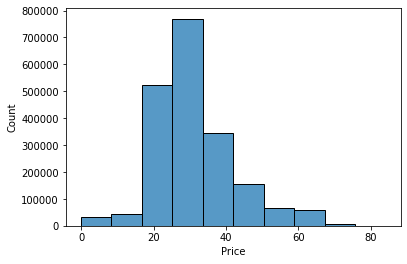

In [90]:
# Histogram
sns.histplot(dt_pd['Price'], bins=10)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='book_id', ylabel='Price'>

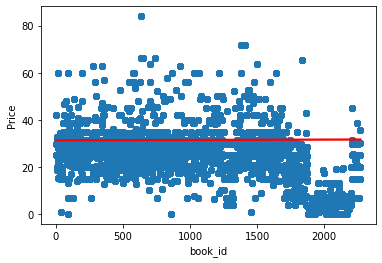

In [91]:
# price change by book_id ?
sns.regplot(dt_pd['book_id'], dt_pd['Price'], line_kws={"color": "red"})

# Data Cleansing with Spark

### Change Data type

In [92]:
# Show Schema
dt.printSchema()

root
 |-- timestamp: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- book_id: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- Book Title: string (nullable = true)
 |-- Book Subtitle: string (nullable = true)
 |-- Book Author: string (nullable = true)
 |-- Book Narrator: string (nullable = true)
 |-- Audio Runtime: string (nullable = true)
 |-- Audiobook_Type: string (nullable = true)
 |-- Categories: string (nullable = true)
 |-- Rating: string (nullable = true)
 |-- Total No. of Ratings: double (nullable = true)
 |-- Price: double (nullable = true)
 |-- conversion_rate: double (nullable = true)
 |-- THBPrice: double (nullable = true)



In [93]:
# change string to datetime
from pyspark.sql import functions as f

dt_clean = dt.withColumn("timestamp",
                        f.to_timestamp(dt.timestamp, 'yyyy-MM-dd HH:mm:ss')
                        )
dt_clean.show()

+-------------------+--------+-------+--------------------+--------------------+--------------------+------------------+-------------------+------------------+--------------------+--------------------+------+--------------------+-----+---------------+------------------+
|          timestamp| user_id|book_id|             country|          Book Title|       Book Subtitle|       Book Author|      Book Narrator|     Audio Runtime|      Audiobook_Type|          Categories|Rating|Total No. of Ratings|Price|conversion_rate|          THBPrice|
+-------------------+--------+-------+--------------------+--------------------+--------------------+------------------+-------------------+------------------+--------------------+--------------------+------+--------------------+-----+---------------+------------------+
|2021-05-01 00:00:01|ad8eca41|   1584|            Portugal|        Sycamore Row|                null|      John Grisham|       Michael Beck|20 hrs and 46 mins|Unabridged Audiobook|Mystery

In [95]:
# Show Schema
dt_clean.printSchema()

root
 |-- timestamp: timestamp (nullable = true)
 |-- user_id: string (nullable = true)
 |-- book_id: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- Book Title: string (nullable = true)
 |-- Book Subtitle: string (nullable = true)
 |-- Book Author: string (nullable = true)
 |-- Book Narrator: string (nullable = true)
 |-- Audio Runtime: string (nullable = true)
 |-- Audiobook_Type: string (nullable = true)
 |-- Categories: string (nullable = true)
 |-- Rating: string (nullable = true)
 |-- Total No. of Ratings: double (nullable = true)
 |-- Price: double (nullable = true)
 |-- conversion_rate: double (nullable = true)
 |-- THBPrice: double (nullable = true)



### Anomalies Check

#### Lexcical error

In [96]:
dt_clean.select("Country").distinct().sort("Country").show(58 , False )

+------------------------+
|Country                 |
+------------------------+
|Algeria                 |
|Argentina               |
|Australia               |
|Austria                 |
|Bahamas                 |
|Belgium                 |
|Brazil                  |
|Canada                  |
|China                   |
|Colombia                |
|Croatia                 |
|Denmark                 |
|Dubai                   |
|Egypt                   |
|Estonia                 |
|Finland                 |
|France                  |
|Germany                 |
|Greece                  |
|Hungary                 |
|India                   |
|Indonesia               |
|Ireland                 |
|Israel                  |
|Italy                   |
|Jamaica                 |
|Japan                   |
|Kenya                   |
|Kuwait                  |
|Malaysia                |
|Maldives                |
|Mexico                  |
|Montenegro              |
|Netherlands             |
|

In [ ]:
# if have the lexical error, can change it
"""
from pyspark.sql.functions import when

dt_clean_country = dt_clean.withColumn("CountryUpdate", 
                                       when(dt_clean['Country'] == 'Japane', 'Japan').otherwise(dt_clean['Country'])
                                       )

dt_clean = dt_clean_country.drop("Country").withColumnRenamed('CountryUpdate', 'Country')
"""

#### Integrity constraints

In [98]:
# check user id that have 8 character ? 
dt_correct_userid = dt_clean.filter(dt_clean["user_id"].rlike("^[0-9a-z]{8}$"))
dt_incorrect_userid = dt_clean.subtract(dt_correct_userid)

dt_incorrect_userid.show(10)

+---------+-------+-------+-------+----------+-------------+-----------+-------------+-------------+--------------+----------+------+--------------------+-----+---------------+--------+
|timestamp|user_id|book_id|country|Book Title|Book Subtitle|Book Author|Book Narrator|Audio Runtime|Audiobook_Type|Categories|Rating|Total No. of Ratings|Price|conversion_rate|THBPrice|
+---------+-------+-------+-------+----------+-------------+-----------+-------------+-------------+--------------+----------+------+--------------------+-----+---------------+--------+
+---------+-------+-------+-------+----------+-------------+-----------+-------------+-------------+--------------+----------+------+--------------------+-----+---------------+--------+



In [ ]:
# if have the Integrity constraints, can change it
"""
# check
dt_correct_userid = dt_clean.filter(dt_clean["user_id"].rlike("^[0-9a-z]{8}$"))
dt_incorrect_userid = dt_clean.subtract(dt_correct_userid)

dt_incorrect_userid.show(10)

# collect it
dt_clean_userid = dt_clean.withColumn("user_id_update", 
                                       when(dt_clean['user_id'] == 'ca86d17200', 'ca86d172').otherwise(dt_clean['user_id'])
                                       )

dt_clean = dt_clean_userid.drop('user_id').withColumnRenamed('user_id_update', 'user_id')
"""

 #### Missing values

In [100]:
# check missing values in user_id
dt_clean.where( dt_clean.user_id.isNull() ).show()

+---------+-------+-------+-------+----------+-------------+-----------+-------------+-------------+--------------+----------+------+--------------------+-----+---------------+--------+
|timestamp|user_id|book_id|country|Book Title|Book Subtitle|Book Author|Book Narrator|Audio Runtime|Audiobook_Type|Categories|Rating|Total No. of Ratings|Price|conversion_rate|THBPrice|
+---------+-------+-------+-------+----------+-------------+-----------+-------------+-------------+--------------+----------+------+--------------------+-----+---------------+--------+
+---------+-------+-------+-------+----------+-------------+-----------+-------------+-------------+--------------+----------+------+--------------------+-----+---------------+--------+



In [ ]:
# if have missing values
"""
dt_clean_userid = dt_clean.withColumn("user_id_update", 
                                when(dt_clean['user_id'].isNull(), '00000000').otherwise(dt_clean['user_id'])
                                )
"""

#### Outliers

<AxesSubplot:xlabel='Price'>

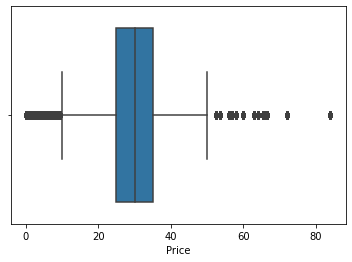

In [103]:
sns.boxplot(x = dt_pd['Price'])

Check that book, is it reasonable ?

# Save Data to CSV

In [ ]:
# save as partitioned files (multiple workers)
dt_clean.write.csv('Cleaned_data.csv', header = True)

In [ ]:
# save as single file (single worker)
dt_clean.coalesce(1).write.csv('Cleaned_Data_Single.csv', header = True)